In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from universe import *
# import seaborn as sns
from utils import *
from fisher import *
from profiles import*
from halo import HaloModel
from kernels import LensCMB
from limber import Limber

%load_ext line_profiler


## Setting up cosmology, mass function, pressure and galaxy profile

In [2]:
cosmo = Cosmo()
mf = MassFunction(cosmo)
ep = ClusterElectronicPressure(cosmo)
dens = ClusterDensity(cosmo, hmf=mf)

/Users/fbianchini/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


## Galaxy (sort of) HOD

(0.01, 100)

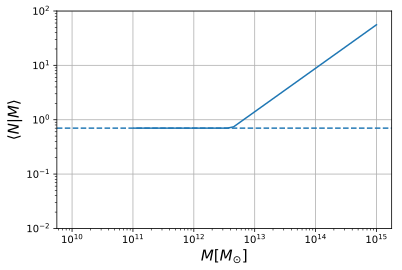

In [8]:
ms=np.logspace(10,15)
plt.plot(ms, dens.N_M(ms))#[dens.N_M(m) for m in ms])
plt.xscale('log')
plt.yscale('log', noposy='clip')
plt.axhline(0.7, ls='--')
plt.xlabel(r'$M [M_{\odot}]$', size=15)
plt.ylabel(r'$\langle N |M \rangle$', size=15)
plt.grid()
plt.ylim(0.01,100)

## Calculate the density profile Fourier transform $u_{\ell}(M,z)$

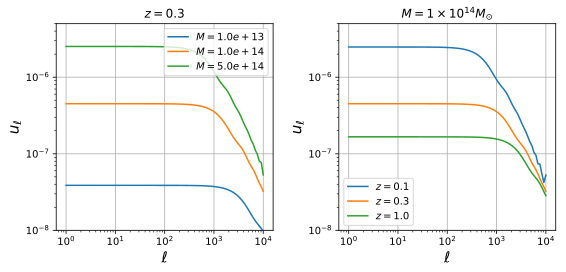

In [26]:
ls = np.logspace(0,4,100)

plt.figure(figsize=(8,4),)
plt.subplot(121)
for M in [1e13, 1e14, 5e14]:
    plt.loglog(ls, [dens.u_g_ell(l, M, 0.3) for l in ls], label=r'$M=%.1e$'%M)
#     plt.loglog(ls, [dens.u_ell(l, M, 0.3) for l in ls], '--', label=r'$M=%.1e$'%M)
plt.legend()
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$u_{\ell}$', size=15)
plt.title(r'$z=0.3$')
plt.grid()
plt.ylim(1e-8,5e-6)

plt.subplot(122)
for z in [0.1,0.3,1.]:
    plt.loglog(ls, [dens.u_g_ell(l, 1e14, z) for l in ls], label=r'$z=%.1f$'%z)
plt.legend()
plt.xlabel(r'$\ell$', size=15)
plt.ylabel(r'$u_{\ell}$', size=15)
plt.title(r'$M=1\times 10^{14}M_{\odot}$')
plt.grid()
plt.ylim(1e-8,5e-6)
plt.tight_layout()

## Calculate tSZ x galaxy density power spectrum

In [17]:
ell_array = np.round(np.logspace(np.log10(2),np.log10(5e3),25))

In [37]:
hm_0_10 = HaloModel(cosmo, mf, lrange=ell_array, npts=50)
hm_0_04 = HaloModel(cosmo, mf, lrange=ell_array, npts=50, zmax=0.4)

In [38]:
cl1h_yg_10 = hm_0_10.GetCl1Halo(ep.y_ell, dens.u_ell)
cl2h_yg_10 = hm_0_10.GetCl2Halo(ep.y_ell, k2=dens.u_ell)
cl1h_yg_04 = hm_0_04.GetCl1Halo(ep.y_ell, dens.u_ell)
cl2h_yg_04 = hm_0_04.GetCl2Halo(ep.y_ell, k2=dens.u_ell)


2.0
3.0
4.0
5.0
7.0
10.0
14.0
20.0
27.0
38.0
52.0
72.0
100.0
139.0
192.0
266.0
368.0
510.0
707.0
980.0
1357.0
1880.0
2605.0
3609.0
5000.0
2.0
3.0
4.0
5.0
7.0
10.0
14.0
20.0
27.0
38.0
52.0
72.0
100.0
139.0
192.0
266.0
368.0
510.0
707.0
980.0
1357.0
1880.0
2605.0
3609.0
5000.0


Text(0,0.5,u'$\\mathcal{D}_{\\ell}^{yg}$')

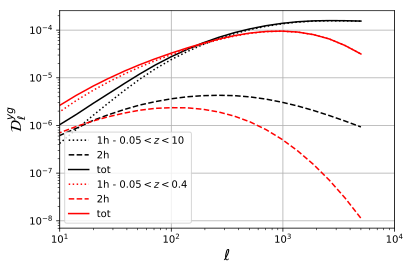

In [39]:
plt.plot(ell_array, ell_array**2*cl1h_yg_10/2/np.pi, 'k:', label=r'1h - $0.05 <z < 10$')
plt.plot(ell_array, ell_array**2*cl2h_yg_10/2/np.pi, 'k--', label=r'2h')
plt.plot(ell_array, ell_array**2*(cl2h_yg_10+cl1h_yg_10)/2/np.pi, 'k-', label=r'tot')
plt.plot(ell_array, ell_array**2*cl1h_yg_04/2/np.pi, 'r:', label=r'1h - $0.05 <z < 0.4$')
plt.plot(ell_array, ell_array**2*cl2h_yg_04/2/np.pi, 'r--', label=r'2h')
plt.plot(ell_array, ell_array**2*(cl2h_yg_04+cl1h_yg_04)/2/np.pi, 'r-', label=r'tot')
plt.xlim([10,10000])
plt.xscale('log')
plt.yscale('log')
# plt.ylim([1e-18,1e-9])
plt.grid()
plt.legend(loc='best')
plt.xlabel(r'$\ell$',size=15)
plt.ylabel(r'$\mathcal{D}_{\ell}^{yg}$',size=15)


In [24]:
dens.u_ell(1000, 1e14, 0.3)

0.00026202344748149696